In [2]:
import sys
assert sys.version_info >=(3,7)


from packaging import version
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [3]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
np.random.seed(42)

In [5]:
# github url로부터 데이터 로드하는 방법
# data_root = "url"
# df = pd.read_csv(data_root + "data/data.csv")


# import urllib.request

# datapath = Path() / "datasets" / "lifesat"
# datapath.mkdir(parents=True, exist_ok=True)

# data_root = "https://github.com/ageron/data/raw/main/"
# for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
#     if not (datapath / filename).is_file():
#         print("Downloading", filename)
#         url = data_root + "lifesat/" + filename
#         urllib.request.urlretrieve(url, datapath / filename)

In [6]:
# 1인당 GRDP: 지역내 총생산을 지역 인구수로 나눈 1인당 연간 생산액
## https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DD9%26tblId%3DINH_1B81A17%26vw_cd%3DMT_GTITLE01%26orgId%3D101%26

# 스트레스인지율: 평소 일상생활 중 스트레스를 “대단히 많이” 또는 “많이” 느끼는 사람의 비율
## https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DD9%26tblId%3DINH_1B81A17%26vw_cd%3DMT_GTITLE01%26orgId%3D101%26

In [49]:
grdp = pd.read_csv('GRDP.csv', encoding='utf-8-sig')
grdp.rename(columns={'2023 p)':'2023',
                     '시도별':'행정구역별'}, inplace=True)
grdp = grdp.iloc[1:,:].set_index('행정구역별')

stress = pd.read_csv('StressPerceived.csv', encoding='utf-8-sig')
stress = stress.set_index('행정구역별')

print(grdp.shape)
display(grdp.head())
print(stress.shape)
display(stress.head())


(17, 3)


,2021,2022,2023
행정구역별,,,
서울특별시,53373,56094,58255
부산광역시,31950,34465,34762
대구광역시,27770,29654,30985
인천광역시,35388,38065,38840
광주광역시,32098,33497,35452


(17, 3)


,2022,2023,2024
행정구역별,,,
서울특별시,25.7,27.1,25.9
부산광역시,22.8,23.9,22.6
대구광역시,22.6,23.8,21.9
인천광역시,26.3,27.0,25.5
광주광역시,25.9,24.7,24.7


In [50]:
df = pd.concat(
    [grdp[['2023']].rename(columns={'2023': 'grdp'}), 
     stress[['2023']].rename(columns={'2023': 'stress'})], 
    axis=1
)
df

,grdp,stress
행정구역별,,
서울특별시,58255,27.1
부산광역시,34762,23.9
대구광역시,30985,23.8
인천광역시,38840,27.0
광주광역시,35452,24.7
대전광역시,36645,28.3
울산광역시,81235,25.8
세종특별자치시,43174,25.8
경기도,43070,27.7


In [51]:
jeju = df.loc['제주특별자치도']
df = df.iloc[:-1,:]
df.reset_index(inplace=True)

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
grdp,16.0,46550.3750,13312.504913,30985.0,36554.50,42607.00,54538.750,81235.0
stress,16.0,25.9875,1.480934,23.8,24.65,26.05,27.125,28.3


In [53]:
jeju

grdp      38450.0
stress       23.5
Name: 제주특별자치도, dtype: float64

In [55]:
df

,행정구역별,grdp,stress
0,서울특별시,58255,27.1
1,부산광역시,34762,23.9
2,대구광역시,30985,23.8
3,인천광역시,38840,27.0
4,광주광역시,35452,24.7
5,대전광역시,36645,28.3
6,울산광역시,81235,25.8
7,세종특별자치시,43174,25.8
8,경기도,43070,27.7
9,강원특별자치도,40713,27.2


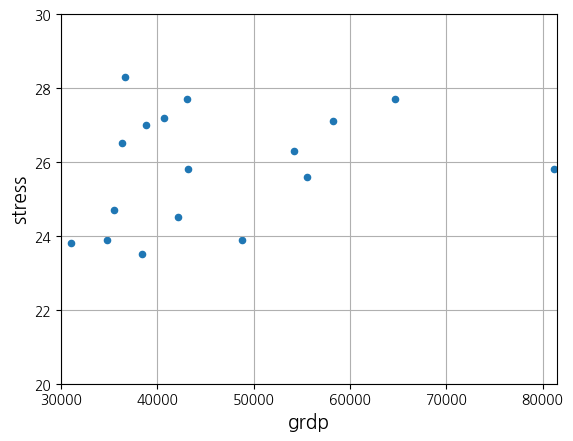

[[25.61162438]]


In [117]:
X = df[['grdp']].values
y = df[['stress']].values

df.plot(kind='scatter', grid=True,
        x="grdp",
        y="stress")
plt.axis([30_000, 81_500, 20,30])
plt.show()

model = LinearRegression()
model.fit(X,y)

# 제주도에 대해 예측을 만듭니다
X_new = [[38450]] # 제주도 1인당 GRDP
print(model.predict(X_new))

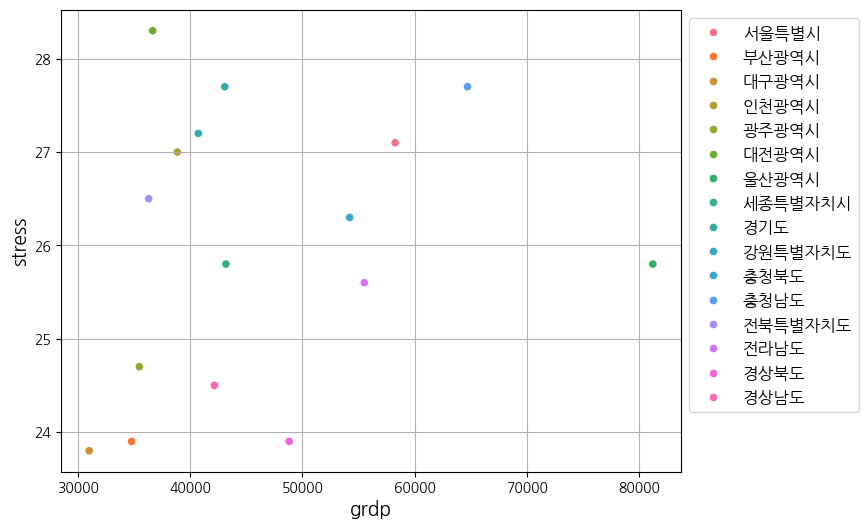

In [85]:
import seaborn as sns
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="grdp", y="stress", hue="행정구역별")
plt.legend(loc='best', 
        #    fontsize=6,
           bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [80]:
X_new


[[38450]]

In [81]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)
print(model.predict(X_new))

[[27.26666667]]


In [84]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
행정구역별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전북특별자치도,전라남도,경상북도,경상남도
grdp,58255,34762,30985,38840,35452,36645,81235,43174,43070,40713,54214,64709,36283,55513,48812,42144
stress,27.1,23.9,23.8,27.0,24.7,28.3,25.8,25.8,27.7,27.2,26.3,27.7,26.5,25.6,23.9,24.5


In [86]:
df = pd.concat(
    [grdp[['2023']].rename(columns={'2023': 'grdp'}), 
     stress[['2023']].rename(columns={'2023': 'stress'})], 
    axis=1
)
df

,grdp,stress
행정구역별,,
서울특별시,58255,27.1
부산광역시,34762,23.9
대구광역시,30985,23.8
인천광역시,38840,27.0
광주광역시,35452,24.7
대전광역시,36645,28.3
울산광역시,81235,25.8
세종특별자치시,43174,25.8
경기도,43070,27.7


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
grdp,17.0,46073.882353,13038.639959,30985.0,36645.0,42144.0,54214.0,81235.0
stress,17.0,25.841176,1.555659,23.5,24.5,25.8,27.1,28.3


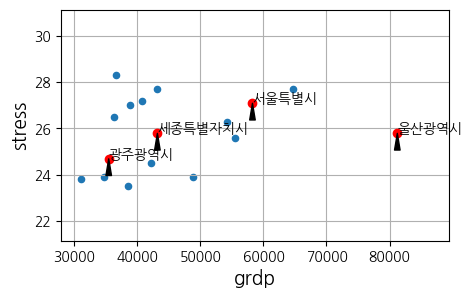

In [112]:
df.plot(kind='scatter', figsize=(5,3), grid=True,
                    x='grdp',
                    y='stress')

min_stress = 23.5
max_stress = 28.3

min_grdp = 30_985
max_grdp = 81_235


position_text = {
    "울산광역시": (81_235, 25.8),
    "광주광역시": (35_452, 24.7),
    "세종특별자치시": (43_174, 25.8),
    "서울특별시": (58_255, 27.1)
    # "대전광역시": (36_645, 28.3)
}

for city, pos_text in position_text.items():
    pos_data_x = df['grdp'].loc[city]
    pos_data_y = df['stress'].loc[city]
    plt.annotate(city, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=10,
                 arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=4))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_grdp*0.9, max_grdp*1.1, min_stress*0.9, max_stress*1.1])

plt.show()

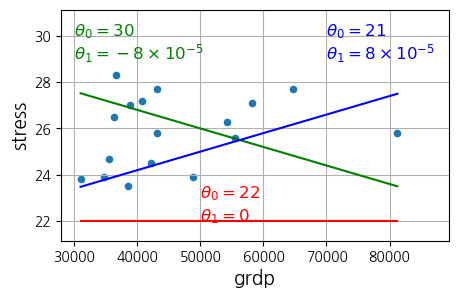

In [134]:
df.plot(kind='scatter', figsize=(5,3), grid=True,
                    x='grdp',
                    y='stress')

X = np.linspace(min_grdp, max_grdp, 100)


w1, w2 = 22, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(50_000, 23, fr"$\theta_0 = {w1}$", color="r")
plt.text(50_000, 22, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 30, -8
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(30_000, 30, fr"$\theta_0 = {w1}$", color="g")
plt.text(30_000, 29, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 21, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(70_000, 30, fr"$\theta_0 = {w1}$", color="b")
plt.text(70_000, 29, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_grdp*0.9, max_grdp*1.1, min_stress*0.9, max_stress*1.1])


plt.show()

In [145]:
from sklearn import linear_model

X_sample = df[['grdp']].values
y_sample = df[['stress']].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"θ0={t0:.2f}, θ1={t1:.2e}")


θ0=24.45, θ1=3.01e-05


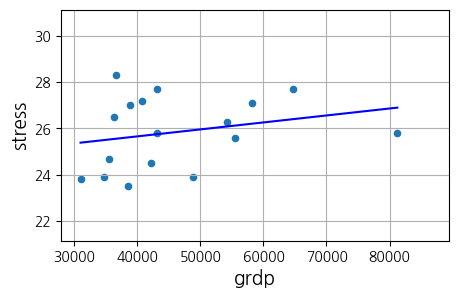

In [155]:
df.plot(kind='scatter', figsize=(5,3), grid=True,
                    x='grdp',
                    y='stress')

X = np.linspace(min_grdp, max_grdp, 1000)

plt.plot(X, t0 + t1 * X, "b")

# plt.text(max_grdp, min_grdp*1,
#          fr"$\theta_0 = {t0:.2f}$", color="b")
# plt.text(max_grdp, min_grdp*1,
#          fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_grdp*0.9, max_grdp*1.1, min_stress*0.9, max_stress*1.1])


plt.show()